In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# uploading dataset
data = pd.read_csv('insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# checking for any null values
data.isnull().sum().sum()

0

In [5]:
# shape of dataset
data.shape

(1338, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


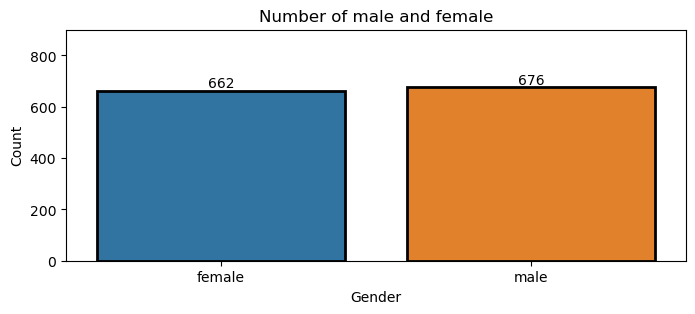

In [7]:
# data analysis
fig,ax = plt.subplots(figsize=(8,3))
sns.countplot(data=data,x='sex',ax=ax,ec='k',lw=2)
ax.bar_label(ax.containers[0])
plt.title('Number of male and female')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.ylim(0,900)
plt.show()

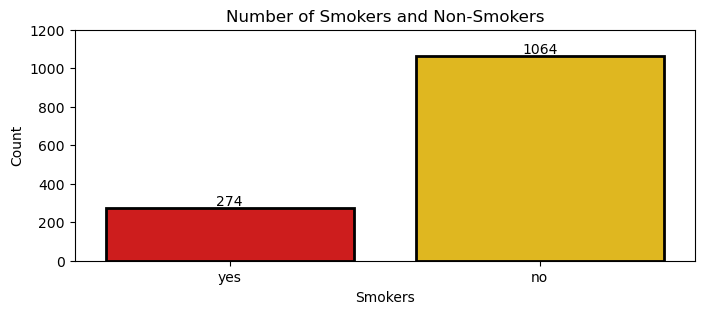

In [8]:
fig,ax = plt.subplots(figsize=(8,3))
sns.countplot(data=data,x='smoker',ax=ax,ec='k',lw=2,palette='hot')
ax.bar_label(ax.containers[0])
plt.title('Number of Smokers and Non-Smokers')
plt.ylabel('Count')
plt.xlabel('Smokers')
plt.ylim(0,1200)
plt.show()

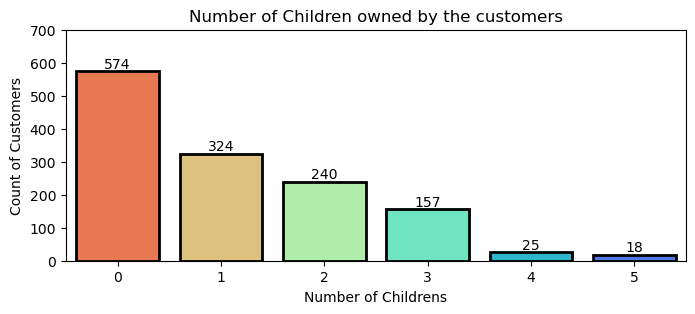

In [9]:
fig,ax = plt.subplots(figsize=(8,3))
sns.countplot(data=data,x='children',ax=ax,ec='k',lw=2,palette='rainbow_r')
ax.bar_label(ax.containers[0])
plt.title('Number of Children owned by the customers')
plt.ylabel('Count of Customers')
plt.xlabel('Number of Childrens')
plt.ylim(0,700)
plt.show()

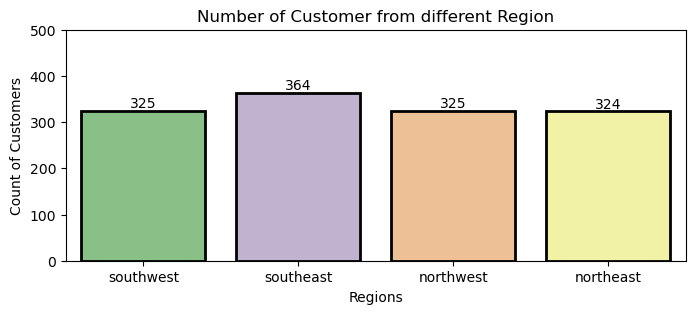

In [10]:
fig,ax = plt.subplots(figsize=(8,3))
sns.countplot(data=data,x='region',ax=ax,ec='k',lw=2,palette='Accent')
ax.bar_label(ax.containers[0])
plt.title('Number of Customer from different Region')
plt.ylabel('Count of Customers')
plt.xlabel('Regions')
plt.ylim(0,500)
plt.show()

In [11]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
# converting categorical data to numerical 
data['sex'] = data['sex'].replace(to_replace=['female','male'],value=[0,1])
data['smoker'] = data['smoker'].replace(to_replace=['no','yes'],value=[0,1])
data['region'] = data['region'].replace(to_replace=['southwest','southeast','northwest','northeast'],value=[0,1,2,3])

In [13]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [14]:
# Separating Features and Targets
X = data.drop(columns='charges')
Y = data['charges']

In [15]:
# Splitting data to train and test
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=1,test_size=.25)

In [16]:
# Random forest Regressor model fitting with training data
RFC = RandomForestRegressor()
RFC_model = RFC.fit(x_train,y_train)

In [17]:
# Model accuracy on training data and test data
y_train_pred = RFC_model.predict(x_train)
y_test_pred = RFC_model.predict(x_test)
print('Model',RFC)
print(f'Train Data {round(r2_score(y_train_pred,y_train)*100,2)}%')
print(f'Test Data {round(r2_score(y_test_pred,y_test)*100,2)}%')

Model RandomForestRegressor()
Train Data 97.53%
Test Data 80.89%


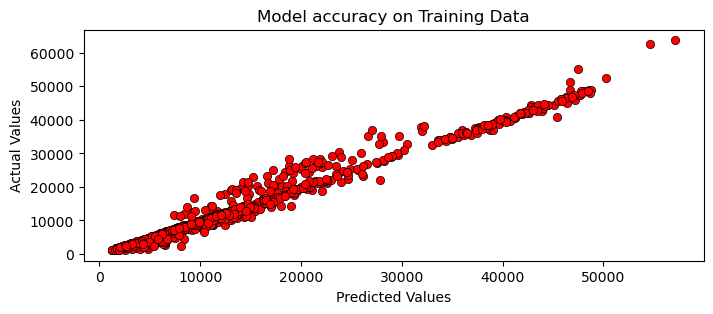

In [18]:
# scatter plot showing model accuracy on training data
x = y_train_pred
y = y_train
fig,ax = plt.subplots(figsize=(8,3))
sns.scatterplot(x,y,ax=ax,ec='k',lw=2,color='r',)
plt.title('Model accuracy on Training Data')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

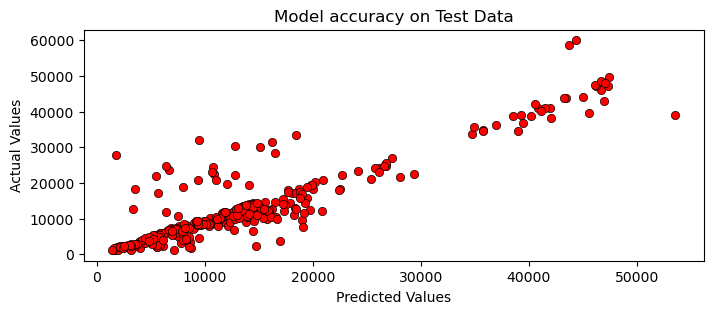

In [19]:
# scatter plot showing model accuracy on test data
x = y_test_pred
y = y_test
fig,ax = plt.subplots(figsize=(8,3))
sns.scatterplot(x,y,ax=ax,ec='k',lw=2,color='r')
plt.title('Model accuracy on Test Data')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# **Model Evaluation** 

In [20]:
new_data = X.iloc[25].values.reshape(1,-1)
predicted = float(RFC_model.predict(new_data))
actual = Y[25]
print('Predicted value:',predicted)
print('Actual value:',actual)
print('Error value:',round(float(predicted)-actual,2))

Predicted value: 14937.404943399986
Actual value: 14001.1338
Error value: 936.27


In [21]:
new_data = X.iloc[250].values.reshape(1,-1)
predicted = float(RFC_model.predict(new_data))
actual = Y[250]
print('Predicted value:',predicted)
print('Actual value:',actual)
print('Error value:',round(float(predicted)-actual,2))

Predicted value: 18467.607952000013
Actual value: 12829.4551
Error value: 5638.15


In [22]:
new_data = X.iloc[125].values.reshape(1,-1)
predicted = float(RFC_model.predict(new_data))
actual = Y[125]
print('Predicted value:',predicted)
print('Actual value:',actual)
print('Error value:',round(float(predicted)-actual,2))

Predicted value: 3653.9927279000035
Actual value: 3385.39915
Error value: 268.59


In [23]:
new_data = X.iloc[500].values.reshape(1,-1)
predicted = float(RFC_model.predict(new_data))
actual = Y[500]
print('Predicted value:',predicted)
print('Actual value:',actual)
print('Error value:',round(float(predicted)-actual,2))

Predicted value: 37417.5580473
Actual value: 36197.699
Error value: 1219.86


In [24]:
new_data = X.iloc[25].values.reshape(1,-1)
predicted = float(RFC_model.predict(new_data))
actual = Y[25]
print('Predicted value:',predicted)
print('Actual value:',actual)
print('Error value:',round(float(predicted)-actual,2))

Predicted value: 14937.404943399986
Actual value: 14001.1338
Error value: 936.27


In [25]:
new_data = X.iloc[700].values.reshape(1,-1)
predicted = float(RFC_model.predict(new_data))
actual = Y[700]
print('Predicted value:',predicted)
print('Actual value:',actual)
print('Error value:',round(float(predicted)-actual,2))

Predicted value: 2013.3056280000008
Actual value: 2020.5523
Error value: -7.25
